In [6]:
import pandas as pd

In [7]:
df_test = pd.read_csv('../data/diabetes.csv')

In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

def plot_clusters(X, labels, centroids):
    # Plot each cluster
    centroids = pd.DataFrame(centroids) 
    pca_result = pd.DataFrame(pca.fit_transform(X),columns = ['pca1','pca2'])
    sns.scatterplot(pca_result, x='pca1',y='pca2',hue=labels,palette='tab10')
    sns.scatterplot(centroids, x=centroids[0],y=centroids[1],c='black')
    
    plt.title('K-Means Clustering')
    plt.xlabel('pca1')
    plt.ylabel('pca2')
    plt.show()

In [10]:
def plot_decision_boundary(kmeans, X, resolution=100):
    X = X.to_numpy()
    # Define bounds of the plot
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    # Generate a grid of points with distance `resolution` between them
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, resolution),
                         np.linspace(y_min, y_max, resolution))
    
    # Predict the cluster for each grid point
    grid = np.c_[xx.ravel(), yy.ravel()]
    labels = kmeans.predict(grid)
    labels = labels.reshape(xx.shape)

    plt.contourf(xx, yy, labels, alpha=0.3,cmap='viridis')

In [11]:
X = df_test.copy()
y = X.pop('Outcome')

from kMeans import KMeans

myKmean = KMeans(k=2)

labels, centroids = myKmean.fit(X)

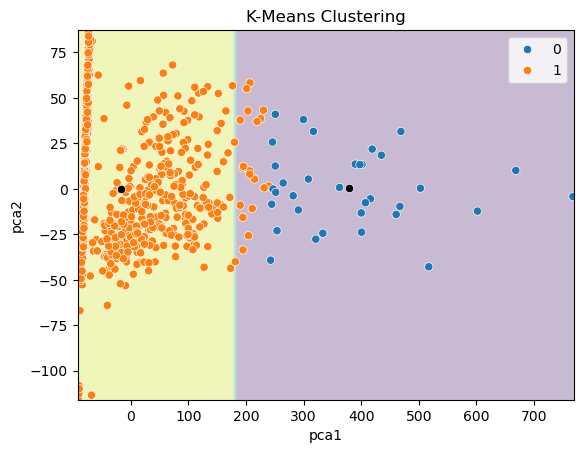

In [12]:
pca = PCA(n_components=2)
X_reduced = pd.DataFrame(pca.fit_transform(X))
labels, centroids = myKmean.fit(X_reduced)
plot_decision_boundary(myKmean, X_reduced, resolution=100)
plot_clusters(X, labels, centroids)

In [13]:
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

# silhouette_avg = []
# for num_clusters in range(2,21):

#     myKmean = KMeans(k=num_clusters)
#     myKmean.fit(X_train)
    

#     cluster_labels = myKmean.labels_
    

#     silhouette_avg.append(silhouette_score(X_train, cluster_labels))

# plt.figure(figsize=(8, 5))
# plt.plot(range(2,21), silhouette_avg, marker='o')
# plt.title("Silhouette scores for various numbers of clusters")
# plt.xlabel("Number of clusters")
# plt.ylabel("Silhouette score")
# plt.xticks(range(2,22))
# plt.show()

In [14]:
def func_inertia(X,centroids,labels):
    distances = np.sqrt(((X.to_numpy() - centroids[labels][:, np.newaxis])**2).sum(axis=2))
    
    return -np.sum(distances**2)

In [15]:
# inertia = []
# for num_clusters in range(2,21):

#     myKmean = KMeans(k=num_clusters)
#     myKmean.fit(X_train)
    

#     centroids = myKmean.centroids
#     labels = myKmean.labels_
    

#     inertia.append(func_inertia(X_train, centroids, labels))

# plt.figure(figsize=(8, 5))
# plt.plot(range(2,21), inertia, marker='o')
# plt.title("Inertia for various numbers of clusters")
# plt.xlabel("Number of clusters")
# plt.ylabel("Inertia")
# plt.xticks(range(2,22))
# plt.show()

In [16]:
df_kyphosis = pd.read_csv('../data/kyphosis.csv')

In [17]:
df_kyphosis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [18]:
X = df_kyphosis.copy()
y = X.pop('Kyphosis')
y = y.map({'absent':0,'present':1})

In [19]:
pca = PCA(n_components=2)
myKmeans = KMeans(3)
X_reduced = pd.DataFrame(pca.fit_transform(X))
labels, centroids = myKmeans.fit(X_reduced)

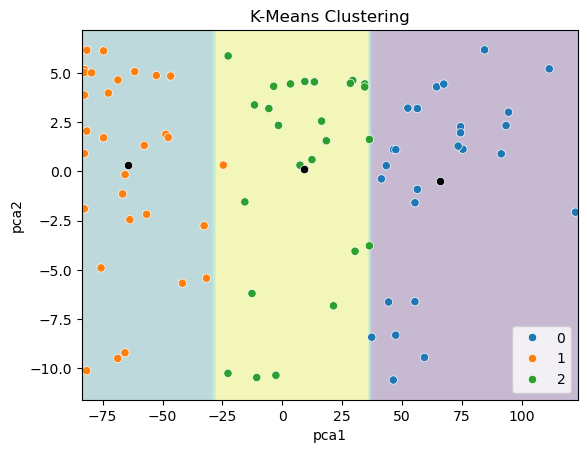

In [20]:
plot_decision_boundary(myKmeans, X_reduced, resolution=100)
plot_clusters(X_reduced, labels, centroids)

In [21]:
customers = pd.read_csv('../data/segmentation_data.csv')

In [22]:
customers = customers.set_index('ID')
customers.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [23]:
X = customers.copy()
y = X.pop('Occupation')

In [24]:
num_col = ['Age','Income']

In [25]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

col_trans = ColumnTransformer([
        ('scaler', MinMaxScaler(),num_col)
    ])

In [26]:
X[num_col] = col_trans.fit_transform(X)

In [27]:
X.head()

,Sex,Marital status,Age,Education,Income,Settlement size
ID,,,,,,
100000001,0,0,0.844828,2,0.324781,2
100000002,1,1,0.068966,1,0.420210,2
100000003,0,0,0.534483,1,0.195144,0
100000004,0,0,0.465517,1,0.496223,1
100000005,0,0,0.603448,1,0.413842,1


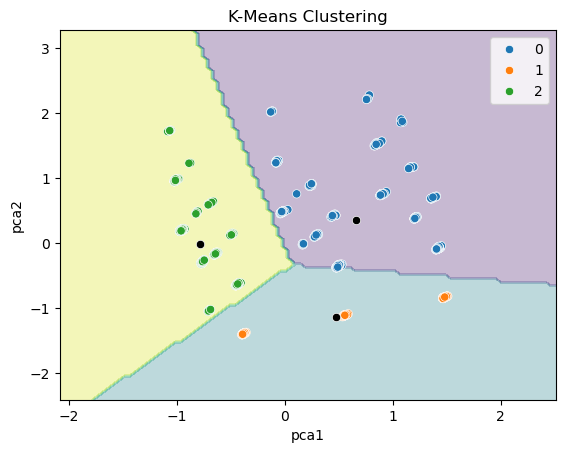

In [28]:
pca = PCA(n_components=2)
myKmeans = KMeans(3,n_init=10)
X_reduced = pd.DataFrame(pca.fit_transform(X))
labels, centroids = myKmeans.fit(X_reduced)
plot_decision_boundary(myKmeans, X_reduced, resolution=100)
plot_clusters(X, labels, centroids)

In [29]:
def silhouette_plot(X, num_clusters):
    silhouette_avg = []
    for i in range(2,num_clusters+1):

        myKmean = KMeans(k=i)
        myKmean.fit(X)


        cluster_labels = myKmean.labels_


        silhouette_avg.append(silhouette_score(X, cluster_labels))

    plt.figure(figsize=(8, 5))
    plt.plot(range(2,num_clusters+1), silhouette_avg, marker='o')
    plt.title("Silhouette scores for various numbers of clusters")
    plt.xlabel("Number of clusters")
    plt.ylabel("Silhouette score")
    plt.xticks(range(2,num_clusters+1))
    plt.show()

In [30]:
# silhouette_plot(X,20)

In [31]:
def inertia_plot(X, num_clusters):
    inertia = []
    for i in range(2,num_clusters+1):

        myKmean = KMeans(k=i)
        myKmean.fit(X)


        centroids = myKmean.centroids
        labels = myKmean.labels_


        inertia.append(func_inertia(X, centroids,labels))

    plt.figure(figsize=(8, 5))
    plt.plot(range(2,num_clusters+1), inertia, marker='o')
    plt.title("Inertia for various numbers of clusters")
    plt.xlabel("Number of clusters")
    plt.ylabel("Inertia")
    plt.xticks(range(2,num_clusters+1))
    plt.show()

In [32]:
# inertia_plot(X_reduced,20)

In [37]:
from sklearn.datasets import make_classification

X_test, y_test = make_classification(n_samples=1000, 
                           n_features=20, 
                           n_informative=2, 
                           n_redundant=2, 
                           n_repeated=0, 
                           n_classes=2, 
                           n_clusters_per_class=2, 
                           weights=[0.5, 0.5], 
                           flip_y=0.03, 
                           class_sep=2, 
                           random_state=42)

X_test = pd.DataFrame(X_test)

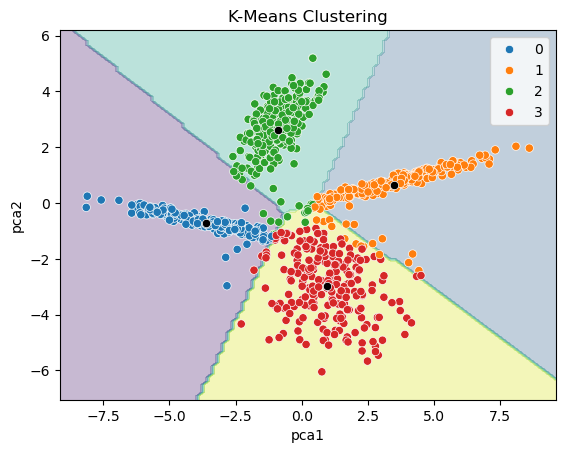

In [38]:
myKmeans = KMeans(4)
X_reduced = pd.DataFrame(pca.fit_transform(X_test))
labels, centroids = myKmeans.fit(X_reduced)
plot_decision_boundary(myKmeans, X_reduced, resolution=100)
plot_clusters(X_test, labels, centroids)

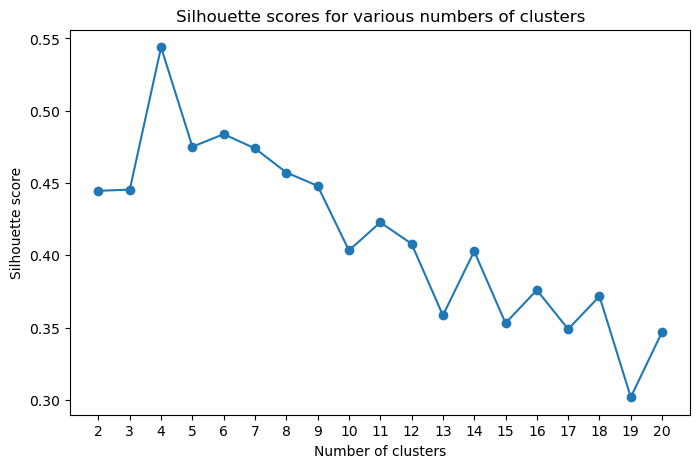

In [40]:
silhouette_plot(X_reduced,20)